# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/richardwillet/Desktop/pymaceuticals-challenge/data/Mouse_metadata.csv"
study_results_path = "/Users/richardwillet/Desktop/pymaceuticals-challenge/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice) == False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data["Mouse ID"].nunique()
clean_mice_count



248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_stats = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats.columns = summary_stats.columns.droplevel(0)
summary_stats.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
summary_stats
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats.columns = summary_stats.columns.droplevel(0)
summary_stats.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean", Median="median", Variance="var", Standard_Deviation="std", SEM="sem"
)

# Display the summary statistics DataFrame
summary_stats_df


,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

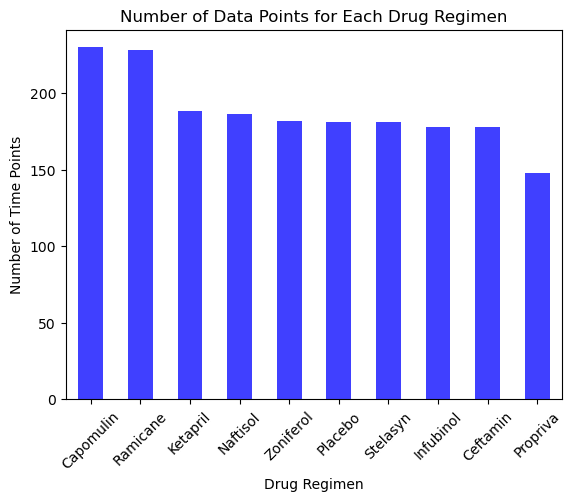

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_data = clean_data["Drug Regimen"].value_counts()
drug_regimen_data.plot(kind="bar", color="blue", alpha=0.75, align="center", width=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time Points")
plt.title("Number of Data Points for Each Drug Regimen")
plt.xticks(rotation=45)
plt.show()



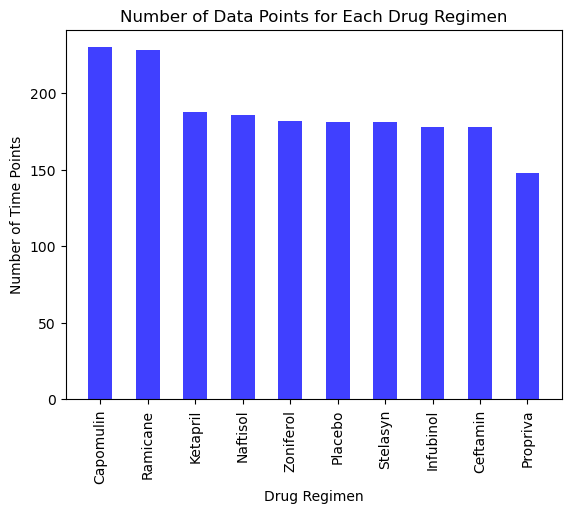

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_data = clean_data["Drug Regimen"].value_counts()
plt.bar(drug_regimen_data.index, drug_regimen_data.values
        , color="blue", alpha=0.75, align="center", width=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time Points")
plt.title("Number of Data Points for Each Drug Regimen")
plt.xticks(rotation=90)
plt.show()



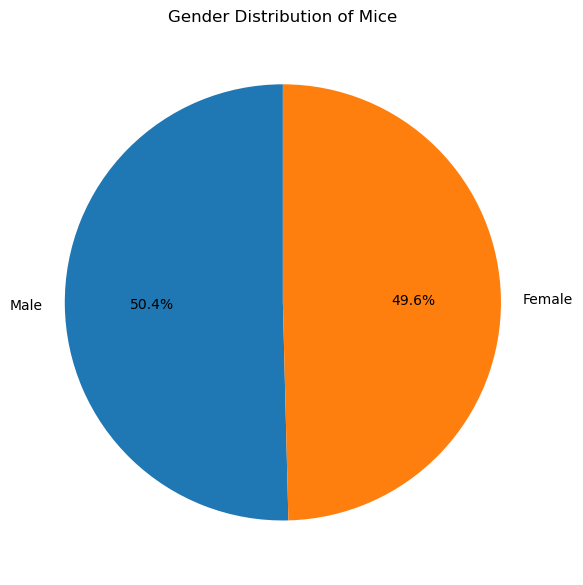

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_gender_counts = clean_data.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()

# Make the pie chart
unique_gender_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6), title="Gender Distribution of Mice", startangle=90)
plt.ylabel("")  # Remove the y-label for cleaner appearance
plt.tight_layout()
plt.show()

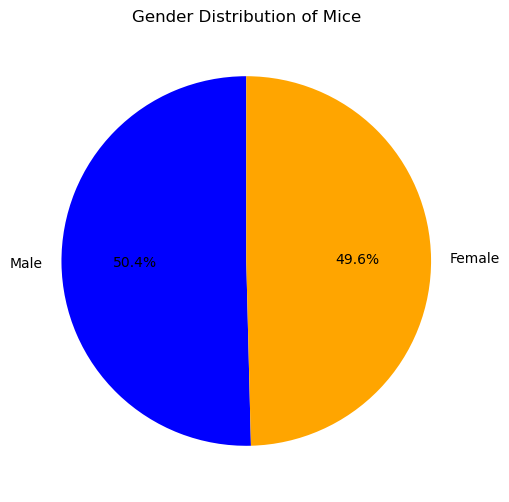

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_gender_counts = clean_data.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()


# Make the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    unique_gender_counts.values, 
    labels=unique_gender_counts.index, 
    autopct="%1.1f%%", 
    startangle=90, 
    colors=["blue", "orange"]
)
plt.title("Gender Distribution of Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(last_timepoints, clean_data, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volumes = final_tumor_volumes[final_tumor_volumes["Drug Regimen"].isin(selected_treatments)]
final_tumor_volumes.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []



# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volumes[final_tumor_volumes["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # add subset
    tumor_volumes.append(treatment_data)

    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq


    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential outliers: {outliers.tolist()}\n")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential outliers: []

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers: []

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers: [36.3213458]

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential outliers: []



/var/folders/59/4v7frb591195wg_tyn0flbzm0000gn/T/ipykernel_48742/3671088563.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=treatments, flierprops=dict(marker="o", markerfacecolor="red", markersize=8))


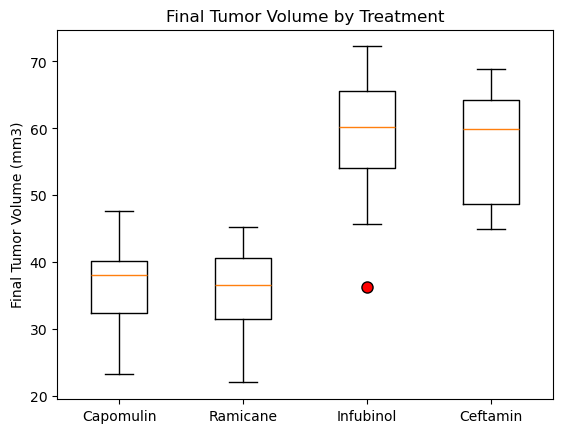

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes, labels=treatments, flierprops=dict(marker="o", markerfacecolor="red", markersize=8))
plt.title("Final Tumor Volume by Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()



## Line and Scatter Plots

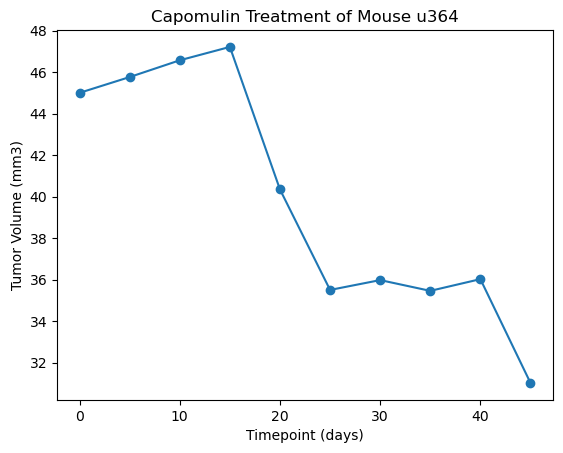

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
mouse = capomulin_data.sample()["Mouse ID"].values[0]
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o")
plt.title(f"Capomulin Treatment of Mouse {mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



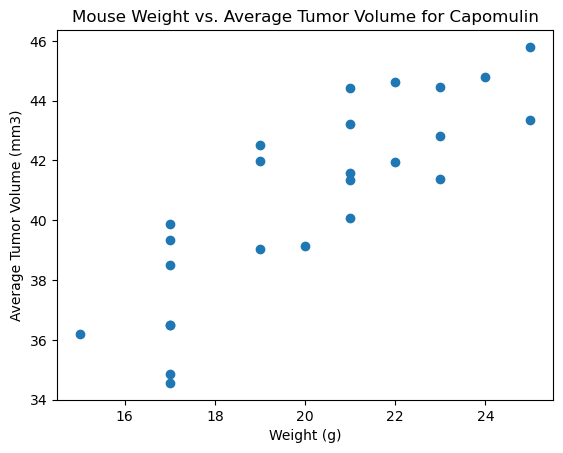

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
